# 6 Crypto Currency Returns

Crypto currencies are hot these days!  In this project we'll show you how to download daily prices for different currencies, and then do some simple analysis.  

<img src="https://www.trustetc.com/wp-content/uploads/2018/09/8crypto.png" width=500/>

We'll look at three different currencies - Bitcoin, Ethereum and Litcoin.

Some of the questions we want to explore are:
* how can we explore crypto data to understand what the typical price of a currency is?
* how can we compare the prices of three different currencies, or their change given they have different price ranges?
* is there a correlation between the behaviour of these currencies?
* how has profitability of these currencies changed over time?
* if we were to buy one of these currencies a few years ago, which would have been the most profitable?

## Set up

In [1]:
import pandas as pd
import requests
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Using an API to retrieve crypto data

The company Cryptocompare kindly offers a free API that provides the historical values of different currencies and exchanges.

Documentation for the API can be found at https://min-api.cryptocompare.com/documentation

We'll use these APIs specifically to get daily data and then generalize it a bit so we can get hourly or minute data.

First, lets get a list of the exchanges that this API supports
https://min-api.cryptocompare.com/documentation?key=Other&cat=allExchangesV4Endpoint


In [2]:
params = {'topTier':'true'}
url = 'https://min-api.cryptocompare.com/data/v4/all/exchanges'
response = requests.get(url, params=params)
data = response.json()['Data']['exchanges']

top_exchanges = list(data)
top_exchanges

['BTCAlpha',
 'BTCBOX',
 'BTCMarkets',
 'BTCTurk',
 'Bibox',
 'Binance',
 'Bit2C',
 'BitBank',
 'BitBay',
 'BitMart',
 'BitTrex',
 'BitZ',
 'Bitfinex',
 'Bithumb',
 'Bitkub',
 'Bitso',
 'Bitstamp',
 'Bleutrade',
 'Cexio',
 'CoinBene',
 'CoinCorner',
 'CoinDeal',
 'CoinFalcon',
 'CoinJar',
 'Coinbase',
 'Coincheck',
 'Coinfloor',
 'Coinmate',
 'Coinone',
 'Coinsbit',
 'DigiFinex',
 'EXRATES',
 'Exmo',
 'Gateio',
 'Gemini',
 'HitBTC',
 'HuobiPro',
 'IndependentReserve',
 'Korbit',
 'Kraken',
 'Kucoin',
 'Kuna',
 'LBank',
 'Liquid',
 'Luno',
 'Lykke',
 'MercadoBitcoin',
 'OKCoin',
 'OKEX',
 'Paymium',
 'Poloniex',
 'TheRockTrading',
 'Upbit',
 'ZB',
 'ZBG',
 'Zaif',
 'aax',
 'bequant',
 'binanceusa',
 'bitFlyer',
 'bitcoincom',
 'bitflyereu',
 'bitflyerus',
 'bithumbglobal',
 'bitmax',
 'bitpanda',
 'blockchaincom',
 'btse',
 'coinfield',
 'crosstower',
 'currency',
 'dcoin',
 'equos',
 'etoro',
 'ftx',
 'gopax',
 'huobijapan',
 'huobikorea',
 'indodax',
 'itBit',
 'lmax',
 'paribu',
 'va

Next, lets look at the coins that are integrated that we can ask about.

Docs: https://min-api.cryptocompare.com/documentation?key=Other&cat=allCoinsWithContentEndpoint


In [3]:
params = {'summary':'true'}
url = 'https://min-api.cryptocompare.com/data/all/coinlist'
response = requests.get(url, params=params)
data = response.json()
df_coins = pd.DataFrame.from_dict(data['Data'], orient='index')
df_coins

,Id,ImageUrl,Symbol,FullName
42,4321,/media/35650717/42.jpg,42,42 Coin (42)
300,749869,/media/27010595/300.png,300,300 token (300)
365,33639,/media/352070/365.png,365,365Coin (365)
404,21227,/media/35650851/404-300x300.jpg,404,404Coin (404)
433,926547,/media/34836095/433.png,433,433 Token (433)
...,...,...,...,...
DBZ,942732,/media/37748367/dbz.png,DBZ,Diamond Boyz Coin (DBZ)
BANKETH,942734,/media/37748368/banketh.png,BANKETH,BankEth (BANKETH)
VICEX,942740,/media/37748371/vicex.png,VICEX,ViceToken (VICEX)
EASYF,938891,/media/37745931/eft.png,EASYF,EasyFeedback (EASYF)


Wow - that's a lot of coins.  Now we know which ones we can get inforation about.

Next, lets see how we can get information about some of our favourite ones: Bitcoin, Ethereum, and LiteCoin.

In [4]:
df_coins.loc[df_coins.Symbol.isin(['ETH','BTC','LTC'])]


,Id,ImageUrl,Symbol,FullName
BTC,1182,/media/37746251/btc.png,BTC,Bitcoin (BTC)
LTC,3808,/media/37746243/ltc.png,LTC,Litecoin (LTC)
ETH,7605,/media/37746238/eth.png,ETH,Ethereum (ETH)


We're good to go!

Next, lets get some history for Etherium

To do this, we need to formulate the right API call.  Here is the documentation

https://min-api.cryptocompare.com/documentation?key=Historical&cat=dataHistoday

From the documentation it looks like the URL is as follows:

'https://min-api.cryptocompare.com/data/histoday'

Then we need to add the exchange as a `e` parameter.  The symbol is `fsym`.  The currency is `tsym`.  We'll use a limit of `2000` entries, aggregate to 1 day leave others.


In [5]:
params = {
    'e':'Bitstamp',
    'fsym':'ETH',
    'tsym':'USD',
    'limit':2000,
    'aggregate':1}

url = 'https://min-api.cryptocompare.com/data/histoday'
response = requests.get(url, params=params)

# we know the data is in the Data field
data = response.json()['Data']
# method to convert arrays of objects into rows
df_eth = pd.json_normalize(data)
# we only want these fields
df_eth = df_eth[['time', 'close', 'high', 'low', 'open', 'volumefrom', 'volumeto']]
df_eth

,time,close,high,low,open,volumefrom,volumeto
0,1454716800,0.00,0.00,0.00,0.00,0.00,0.000000e+00
1,1454803200,0.00,0.00,0.00,0.00,0.00,0.000000e+00
2,1454889600,0.00,0.00,0.00,0.00,0.00,0.000000e+00
3,1454976000,0.00,0.00,0.00,0.00,0.00,0.000000e+00
4,1455062400,0.00,0.00,0.00,0.00,0.00,0.000000e+00
...,...,...,...,...,...,...,...
1996,1627171200,2194.00,2199.49,2108.00,2185.86,19955.29,4.322392e+07
1997,1627257600,2228.00,2435.01,2175.57,2194.00,58867.06,1.366236e+08
1998,1627344000,2304.62,2321.80,2150.62,2228.00,33758.20,7.594619e+07
1999,1627430400,2299.52,2347.15,2244.81,2304.62,33002.47,7.583673e+07


Next, lets convert the timestamps to human readable dates, and drop the time field.

In [6]:
df_eth['datetime'] = pd.to_datetime(df_eth.time, unit='s')
# reorder and drop time
df_eth = df_eth[['datetime', 'close', 'high', 'low', 'open', 'volumefrom', 'volumeto']]
# df_btc = df_btc.drop(columns=['time'])
df_eth

,datetime,close,high,low,open,volumefrom,volumeto
0,2016-02-06,0.00,0.00,0.00,0.00,0.00,0.000000e+00
1,2016-02-07,0.00,0.00,0.00,0.00,0.00,0.000000e+00
2,2016-02-08,0.00,0.00,0.00,0.00,0.00,0.000000e+00
3,2016-02-09,0.00,0.00,0.00,0.00,0.00,0.000000e+00
4,2016-02-10,0.00,0.00,0.00,0.00,0.00,0.000000e+00
...,...,...,...,...,...,...,...
1996,2021-07-25,2194.00,2199.49,2108.00,2185.86,19955.29,4.322392e+07
1997,2021-07-26,2228.00,2435.01,2175.57,2194.00,58867.06,1.366236e+08
1998,2021-07-27,2304.62,2321.80,2150.62,2228.00,33758.20,7.594619e+07
1999,2021-07-28,2299.52,2347.15,2244.81,2304.62,33002.47,7.583673e+07


We've found cases where all of the values are zero, at the beginning.  Lets clean the data to make sure there are no entries where there is no data

In [7]:
indices = df_eth[df_eth.sum(axis=1) == 0].index
print('Filtering %d empty datapoints' % indices.shape[0])
df_eth = df_eth.drop(indices)
df_eth

Filtering 642 empty datapoints


,datetime,close,high,low,open,volumefrom,volumeto
642,2017-11-09,321.32,331.70,317.29,322.15,13118.15,4.270935e+06
643,2017-11-10,298.66,325.61,291.00,321.32,34411.65,1.058054e+07
644,2017-11-11,315.76,322.19,298.00,298.66,23836.74,7.328432e+06
645,2017-11-12,306.10,318.98,300.11,315.76,48200.80,1.485482e+07
646,2017-11-13,316.14,320.69,305.91,306.10,36613.50,1.151786e+07
...,...,...,...,...,...,...,...
1996,2021-07-25,2194.00,2199.49,2108.00,2185.86,19955.29,4.322392e+07
1997,2021-07-26,2228.00,2435.01,2175.57,2194.00,58867.06,1.366236e+08
1998,2021-07-27,2304.62,2321.80,2150.62,2228.00,33758.20,7.594619e+07
1999,2021-07-28,2299.52,2347.15,2244.81,2304.62,33002.47,7.583673e+07


great - it looks like we now have clean data!

## Saving data to a file

Now that we have the history, lets save it to a file so we can reload it easier next time.  This is pretty easy with pandas but we want to make sure its in the right place.

In [18]:
path = 'datasets/crypto_data/'
filename = 'eth_history.csv'
print(f'Saving data to {path}{filename}')
df_eth.to_csv(f'{path}{filename}', index=False)

Saving data to datasets/crypto_data/eth_history.csv


## Functions for reuse

Nice, now that we've sorted this, we want to make this code reusable so we can easily download data for other coins, exchanges, and intervals (day, hour, minute).

Lets build some functions:

First function will generate a file name to save the data we've retrieved.

In [19]:
def get_filename(from_symbol, to_symbol, exchange, datetime_interval, download_date, data_path=''):
    '''
    return a filename using the supplied optional path and paramters
    '''
    return f'{data_path}{from_symbol}_{to_symbol}_{exchange}_{datetime_interval}_{download_date}.csv'

In [20]:
def download_data(from_symbol, to_symbol, exchange, datetime_interval):
    '''
    download json data using the CryptoCompare history API
    '''
    supported_intervals = {'minute', 'hour', 'day'}
    assert datetime_interval in supported_intervals,\
        'datetime_interval should be one of %s' % supported_intervals
    print('Downloading %s trading data for %s %s from %s' %
          (datetime_interval, from_symbol, to_symbol, exchange))
    base_url = 'https://min-api.cryptocompare.com/data/histo'
    url = '%s%s' % (base_url, datetime_interval)
    params = {'fsym': from_symbol, 'tsym': to_symbol,
              'limit': 2000, 'aggregate': 1,
              'e': exchange}
    request = requests.get(url, params=params)
    data = request.json()
    return data

In [21]:
def convert_to_dataframe(data):
    '''
    Convert data in dict to a pandas dataframe for analysis
    We convert the time to a datetime, and keep only certain columns
    '''

    df = pd.json_normalize(data, ['Data'])
    df['datetime'] = pd.to_datetime(df.time, unit='s')
    df = df[['datetime', 'low', 'high', 'open',
             'close', 'volumefrom', 'volumeto']]
    return df

In [22]:
def filter_empty_datapoints(df):
    '''filter out rows where all of the columns are zero
    '''
    indices = df[df.sum(axis=1) == 0].index
    print('Filtering %d empty datapoints' % indices.shape[0])
    df = df.drop(indices)
    return df

def download_and_save(from_symbol, to_symbol, exchange, datetime_interval, data_path=''):
    '''
    Download data from the API, clean it, and save it to a CSV file!
    '''
    data = download_data(from_symbol, to_symbol, exchange, datetime_interval)
    df = convert_to_dataframe(data)
    df = filter_empty_datapoints(df)
    current_datetime = datetime.now().date().isoformat()
    filename = get_filename(from_symbol, to_symbol, exchange, datetime_interval, current_datetime, data_path=data_path)
    print(f'Saving data to {filename}')
    df.to_csv(filename, index=False)


In [23]:
download = False    # disable/enable API calls

# data_path = '/content/drive/MyDrive/Colab Notebooks/data/crypto_data/'
data_path = 'datasets/crypto_data/'
exchange = 'Bitstamp' # Coinbase
datetime_interval = 'day'
coins = ['BTC','ETH','LTC']
currency = 'USD'
if download:
    for coin in coins:
        download_and_save(coin, currency, exchange, datetime_interval, data_path=data_path)


Now that we have nice CSV files to work with, lets load one up for analysis.  We'll use the LTC file.


In [24]:
filename = get_filename('LTC', 'USD', 'Bitstamp', 'day', '2021-06-06', data_path=data_path)
print(f'Reading data from {filename}')
df = pd.read_csv(filename)
# convert string from the csv file to a datetime
df.datetime = pd.to_datetime(df.datetime)
# change the index to the datetime
df = df.set_index('datetime')     
# sort it         
df = df.sort_index() # sort by datetime
print(df.shape)


Reading data from datasets/crypto_data/LTC_USD_Bitstamp_day_2021-06-06.csv
(1443, 6)


Lets create a function for this as well to make it easy to call this for different files

In [25]:
def read_dataset(filename):
    print(f'Reading data from {filename}')
    df = pd.read_csv(filename)
    df.datetime = pd.to_datetime(df.datetime)
    df = df.set_index('datetime') 
    df = df.sort_index()
    print(df.shape)
    return df

Now we'll load up several data frames

In [26]:
df_btc = read_dataset(get_filename('BTC', 'USD', 'Bitstamp', 'day', '2021-06-06',data_path=data_path))
df_eth = read_dataset(get_filename('ETH', 'USD', 'Bitstamp', 'day', '2021-06-06',data_path=data_path))
df_ltc = read_dataset(get_filename('LTC', 'USD', 'Bitstamp', 'day', '2021-06-06',data_path=data_path))

Reading data from datasets/crypto_data/BTC_USD_Bitstamp_day_2021-06-06.csv
(2001, 6)
Reading data from datasets/crypto_data/ETH_USD_Bitstamp_day_2021-06-06.csv
(1306, 6)
Reading data from datasets/crypto_data/LTC_USD_Bitstamp_day_2021-06-06.csv
(1443, 6)


In [27]:
df_eth.head()

,low,high,open,close,volumefrom,volumeto
datetime,,,,,,
2017-11-09,317.29,331.70,322.15,321.32,13118.15,4270934.90
2017-11-10,291.00,325.61,321.32,298.66,34411.65,10580539.65
2017-11-11,298.00,322.19,298.66,315.76,23836.74,7328431.51
2017-11-12,300.11,318.98,315.76,306.10,48200.80,14854823.36
2017-11-13,305.91,320.69,306.10,316.14,36613.50,11517856.30


In [28]:
df = pd.DataFrame({'BTC': df_btc.close,
                   'ETH': df_eth.close,
                   'LTC': df_ltc.close})
df = df.dropna()
df.head()

,BTC,ETH,LTC
datetime,,,
2017-11-09,7148.00,321.32,64.48
2017-11-10,6588.18,298.66,59.08
2017-11-11,6355.13,315.76,62.47
2017-11-12,5870.37,306.10,58.70
2017-11-13,6525.17,316.14,61.03


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2017-11-09 to 2021-06-06
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     1306 non-null   float64
 1   ETH     1306 non-null   float64
 2   LTC     1306 non-null   float64
dtypes: float64(3)
memory usage: 40.8 KB


Lets look at some stats

In [30]:
df.describe()

,BTC,ETH,LTC
count,1306.000000,1306.000000,1306.000000
mean,13470.015613,538.038530,95.932550
std,13477.156522,649.683556,66.879637
min,3179.540000,82.910000,22.820000
25%,6738.032500,180.207500,48.632500
50%,8919.025000,268.970000,68.425000
75%,11428.625000,576.780000,127.695000
max,63564.480000,4179.470000,388.320000


Look at LTC more closely using a boxplot.

A box plot shows the quartiles of the dataset with points that are determined to be outliers using a method of the inter-quartile range (IQR). In other words, the IQR is the first quartile (25%) subtracted from the third quartile (75%).

So most of the prices are between 50 and 100.  Anything else is unsual.

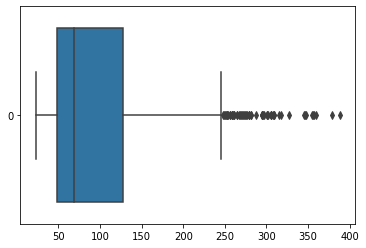

In [31]:
import seaborn as sns
ax = sns.boxplot(data=df['LTC'], orient="h")

Lets look at a histogram of the prices and draw the median and mean

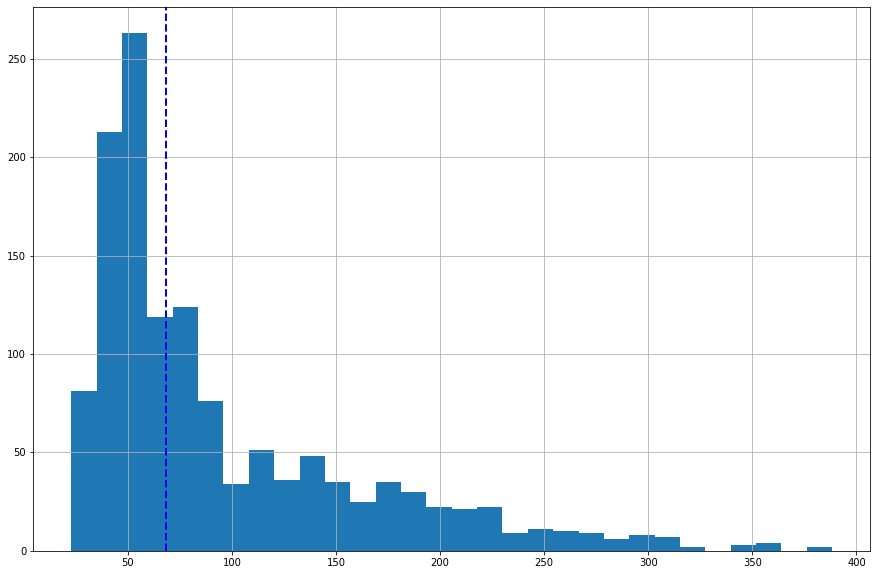

In [32]:
df['LTC'].hist(bins=30, figsize=(15,10)).axvline(df['LTC'].median(), color='b', linestyle='dashed', linewidth=2)

Absolute price plot

<AxesSubplot:xlabel='datetime'>

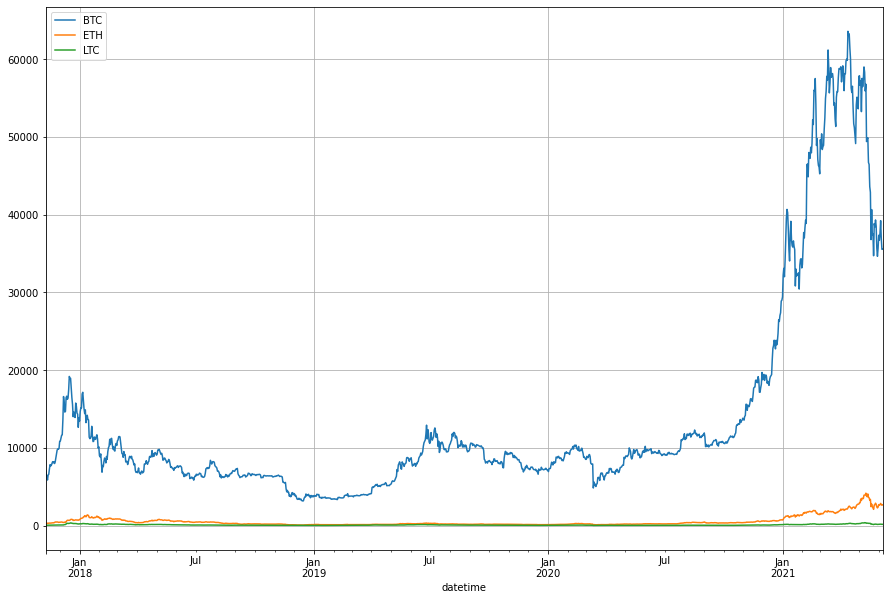

In [33]:
df.plot(grid=True, figsize=(15, 10))

relative plot

We create an axis for each plot separately.

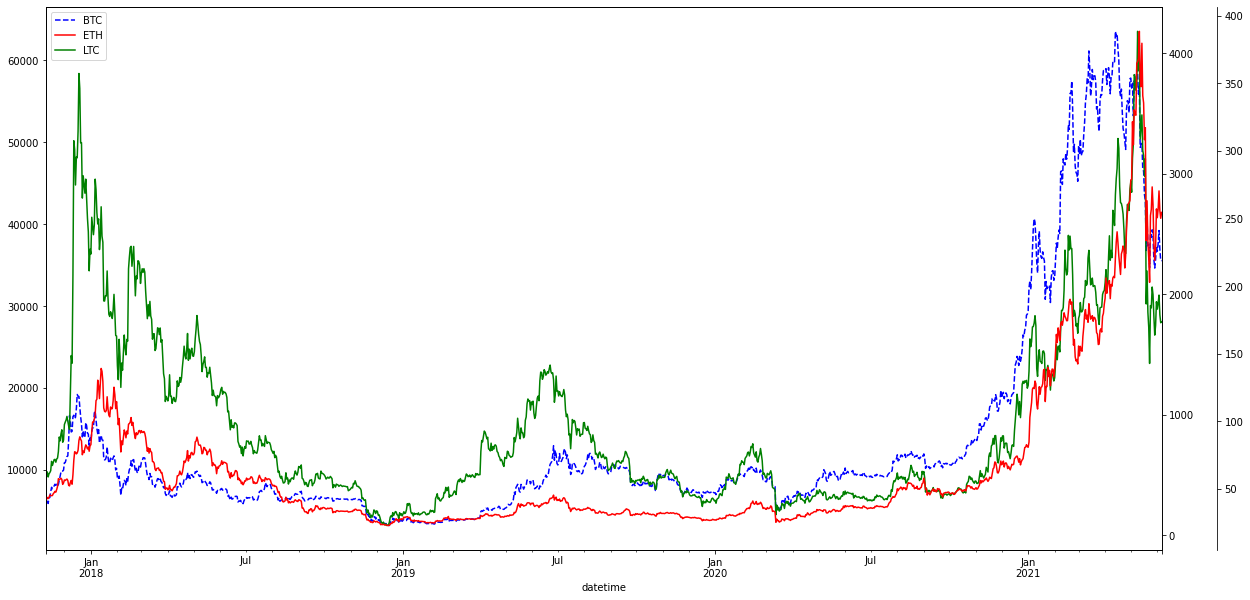

In [34]:
fig, ax1 = plt.subplots(figsize=(20, 10))
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# move this axis over to the right a bit - magic.
rspine = ax2.spines['right']
rspine.set_position(('axes', 1.05))

df['BTC'].plot(ax=ax1, style='b--')
df['ETH'].plot(ax=ax1, style='r-', secondary_y=True)  # use a secondary y-axis on the right
df['LTC'].plot(ax=ax2, style='g-')

# legend
ax2.legend([ax1.get_lines()[0],
            ax1.right_ax.get_lines()[0],
            ax2.get_lines()[0]],
           ['BTC', 'ETH', 'LTC'])

generate correlation matrix for heatmap

<AxesSubplot:>

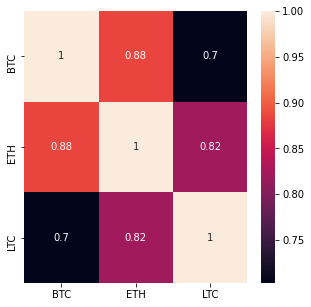

In [35]:

# Compute the correlation matrix
corr = df.corr()

f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True)

Profitability if I bought one of these when all three were available.

We apply a function to each that takes the current one divided by the first price

In [36]:
df_return = df.apply(lambda x: x / x[0]) # drop null rows
df_return.head()

,BTC,ETH,LTC
datetime,,,
2017-11-09,1.000000,1.000000,1.000000
2017-11-10,0.921682,0.929478,0.916253
2017-11-11,0.889078,0.982696,0.968828
2017-11-12,0.821260,0.952633,0.910360
2017-11-13,0.912867,0.983879,0.946495


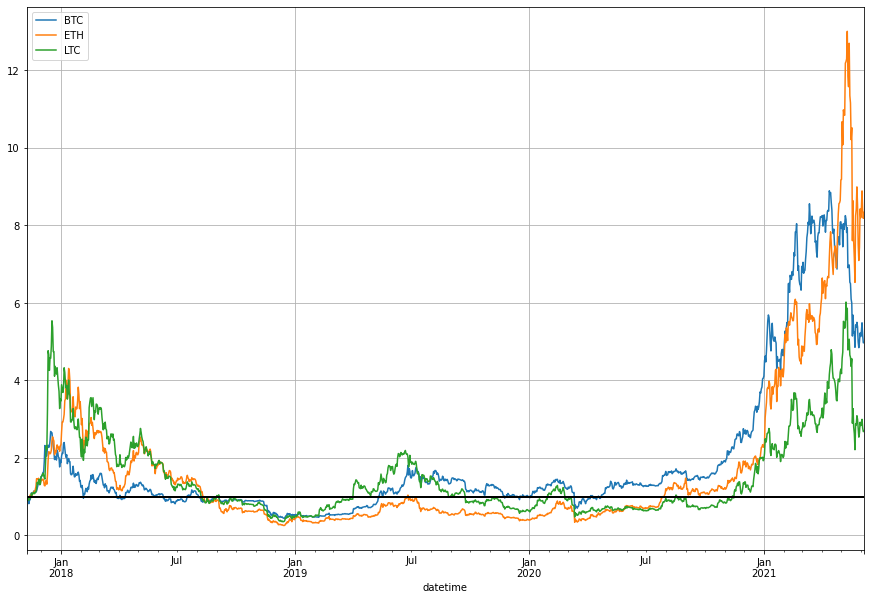

In [37]:
df_return.plot(grid=True, figsize=(15, 10)).axhline(y = 1, color = "black", lw = 2)

what was the percentage increase?

,BTC,ETH,LTC
datetime,,,
2021-06-06,497.364578,833.517988,268.998139


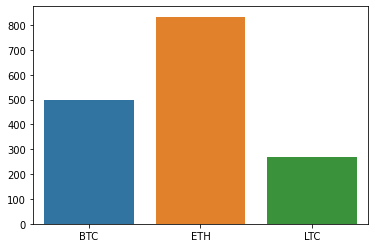

In [38]:
df_perc = df_return.tail(1) * 100
ax = sns.barplot(data=df_perc)
df_perc

How many could we buy for $1000?

,BTC,ETH,LTC
datetime,,,
2017-11-09,0.139899,3.112162,15.508685


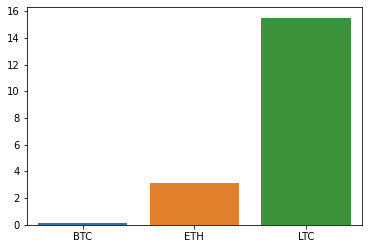

In [39]:
budget = 1000 # USD
df_coins = budget/df.head(1)

ax = sns.barplot(data=df_coins)
df_coins

How much money would we make if we invested $1000 a while ago

,BTC,ETH,LTC
datetime,,,
2021-06-06,4973.645775,8335.179883,2689.98139


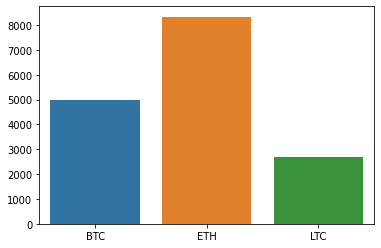

In [40]:
df_profit = df_return.tail(1) * budget

ax = sns.barplot(data=df_profit)
df_profit

# Next

Using a package called stockstats, can we provide more information for trading?
Can you normalize the data feed for this package and then use one of the strategies supported by this package?

To install a package try
!pip install stockstats



# References

* https://towardsdatascience.com/cryptocurrency-analysis-with-python-buy-and-hold-c3b0bc164ffa

* https://towardsdatascience.com/cryptocurrency-analysis-with-python-macd-452ceb251d7c


# Experiments

In [41]:
!pip install stockstats

  Using cached stockstats-0.3.2-py2.py3-none-any.whl (13 kB)
  Using cached int_date-0.1.8-py2.py3-none-any.whl (5.0 kB)


In [42]:
from stockstats import StockDataFrame
df_btc = StockDataFrame.retype(df_btc)
df_btc['macd'] = df_btc.get('macd') # calculate MACD
df_btc.tail()

,low,high,open,close,volumefrom,volumeto,macd,macds,macdh
datetime,,,,,,,,,
2021-06-02,35933.19,38256.30,36693.30,37589.36,4270.10,1.595423e+08,-3903.501922,-4277.061516,373.559594
2021-06-03,37176.06,39490.00,37589.36,39219.88,4058.94,1.567207e+08,-3519.381262,-4125.525465,606.144203
2021-06-04,35576.67,39277.36,39219.88,36887.32,5786.19,2.137323e+08,-3364.398281,-3973.300028,608.901747
2021-06-05,34849.65,37927.93,36887.32,35532.14,4106.35,1.492555e+08,-3312.737675,-3841.187558,528.449883
2021-06-06,35437.86,36510.58,35532.14,35551.62,2288.95,8.229941e+07,-3232.956884,-3719.541423,486.584539


<AxesSubplot:xlabel='datetime'>

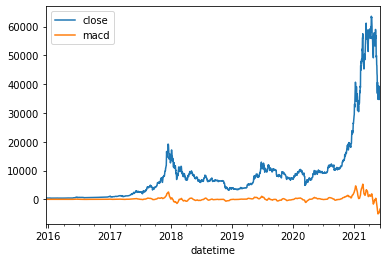

In [43]:
df_btc[['close','macd']].plot()

In [45]:
df

,BTC,ETH,LTC
datetime,,,
2017-11-09,7148.00,321.32,64.48
2017-11-10,6588.18,298.66,59.08
2017-11-11,6355.13,315.76,62.47
2017-11-12,5870.37,306.10,58.70
2017-11-13,6525.17,316.14,61.03
...,...,...,...
2021-06-02,37589.36,2707.66,187.23
2021-06-03,39219.88,2856.41,193.23
2021-06-04,36887.32,2691.14,178.62


In [49]:
!pip install bokeh

In [52]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource

p = figure(x_axis_type='datetime')

source = ColumnDataSource(df)

p.line(x='datetime', y='BTC', line_width=2, source=source, line_color='red')
p.line(x='datetime', y='ETH', line_width=2, source=source, line_color='blue')
p.line(x='datetime', y='LTC', line_width=2, source=source, line_color='green')
show(p)
